### 손글씨 분류
- 0~9까지 사람이 직접 쓴 손글씨 이미지 데이터
- 10종류를 구분하는 모델을 만듬

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/digit_train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(42000, 785)

In [6]:
# 데이터 시각화
import matplotlib.pyplot as plt

In [8]:
pic0=data.iloc[0,1:]
pic0.shape

(784,)

In [9]:
pic0_reshape=pic0.values.reshape(28,28)

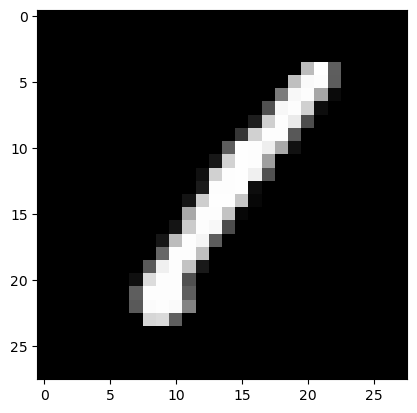

In [10]:
plt.imshow(pic0_reshape, cmap='gray')

(array([700.,   2.,   2.,  14.,   2.,   1.,   4.,   8.,   9.,  42.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

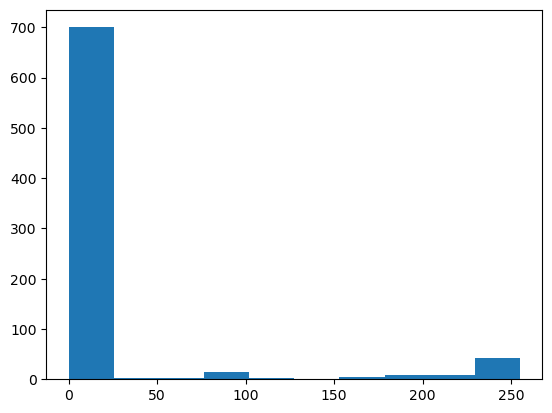

In [11]:
plt.hist(pic0)

In [15]:
# 학습을 위한 데이터 분리
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [16]:
X.shape

(42000, 784)

In [17]:
y.shape

(42000,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# 8: 2 비율로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=511)

In [20]:
 # 모델링(학습 및 평가) 분류모델 LogisticRegression
from sklearn.linear_model import  LogisticRegression

In [21]:
model = LogisticRegression()

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.score(X_test,y_test)

0.9176190476190477

### 데이터 스케일링
- 사진의 픽셀정보는 0~255로 최대/최소
- min max scaler 를 사용해서 0~1 사이 값으로 모든 픽셀을 조정
- 스케일링 효과 : 학습(연산)속도 개선, 거리기반 모델들의 잘못된 판단을 개선

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(X_train) # 현재 데이터 분포의 최소/최대 값 확인 : 변환하는 기준 값 추출

MinMaxScaler()

In [34]:
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [35]:
logi_model=LogisticRegression()

In [37]:
logi_model.fit(X_train_transformed,y_train)

LogisticRegression()

In [38]:
logi_model.score(X_test_transformed,y_test)

0.919047619047619

In [40]:
# 서포트 벡터 머신
from sklearn.svm import LinearSVC # SVM =SVC

In [41]:
# C 값이 클수록 하드마진(오류 허용 안함) - 과대적합 위험
# C 값이 작을수록 하드마진(오류 허용함) - 과소적합 위험
svc_model = LinearSVC()

In [42]:
svc_model.fit(X_train,y_train)

LinearSVC()

In [43]:
svc_model.score(X_test,y_test)

0.8480952380952381

In [44]:
svc_model.fit(X_train_transformed,y_train)

LinearSVC()

In [46]:
svc_model.score(X_test_transformed,y_test)

0.9136904761904762

### 평가지표
- 회귀 : 오차를 기반으로 하는 평가지표를 사용(MSE, RMSE, MAPE, R2-score)
- 분류 : 맞춘 개수를 기반으로 하는 평가지표를 사용
    - Accuracy(정확도) : 전체 데이터 중에 정확히 맞춘 비율
    - Recall(재현율) : 실제 정답중에서 모델이 정확히 맟춘 비율
    - Precision(정밀도): 모델 예측 정답중에서 정확히 맞춘 비율
    - F-1 score : 정밀도와 재현율의 조화평균
- from sklearn.metrics import
    - accuracy_score
    - precision_score
    - recall_score
    - f1_score

In [47]:
from sklearn.metrics import precision_score